# Final Project code

## Research question

Predict use of force from other variables
#add more detail for final deliverable

## Data sources

NY Stop and Frisk Database, 2014

#add more detail for final deliverable

## Exploratory Analysis

In [10]:
#Import libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier


%matplotlib inline

In [11]:
#read in data
df = pd.read_csv("./2014_SQF.csv")

See 2014 SQF codebook (in zip folder) for variable definitons

### Exploratory Data Analysis

In [12]:
#Getting to know the data
df.head()

,year,pct,ser_num,datestop,timestop,city,sex,race,dob,age,...,explnstp,repcmd,revcmd,offunif,offverb,officrid,offshld,radio,recstat,linecm
0,2014,67,15,1012014,2330,2,1.0,1.0,12311900,18.0,...,1,186,186,0,0,0,1,0,1,1
1,2014,7,26,1032014,1530,1,1.0,1.0,12311900,31.0,...,1,863,863,0,1,0,1,0,1,1
2,2014,84,52,1042014,2100,2,1.0,1.0,12311900,16.0,...,1,84,84,0,1,0,1,0,0,1
3,2014,84,13,1092014,1250,2,1.0,5.0,12311900,19.0,...,1,84,84,1,0,0,0,0,1,1
4,2014,77,19,1092014,1310,2,1.0,1.0,12311900,32.0,...,1,187,187,0,1,0,1,0,1,1


In [13]:
#list all of the variables
# SW: Nice!
for x in df.columns.values:
    print x

year
pct
ser_num
datestop
timestop
city
sex
race
dob
age
height
weight
haircolr
eyecolor
build
othfeatr
frisked
searched
contrabn
pistol
riflshot
asltweap
knifcuti
machgun
othrweap
arstmade
arstoffn
sumissue
sumoffen
crimsusp
detailcm
perobs
perstop
pf_hands
pf_wall
pf_grnd
pf_drwep
pf_ptwep
pf_baton
pf_hcuff
pf_pepsp
pf_other
cs_objcs
cs_descr
cs_casng
cs_lkout
cs_cloth
cs_drgtr
cs_furtv
cs_vcrim
cs_bulge
cs_other
rf_vcrim
rf_othsw
rf_attir
rf_vcact
rf_rfcmp
rf_verbl
rf_knowl
rf_furt
rf_bulg
sb_hdobj
sb_outln
sb_admis
sb_other
ac_proxm
ac_evasv
ac_assoc
ac_cgdir
ac_incid
ac_time
ac_stsnd
ac_rept
ac_inves
ac_other
forceuse
inout
trhsloc
premname
addrnum
stname
stinter
crossst
addrpct
sector
beat
post
xcoord
ycoord
typeofid
othpers
explnstp
repcmd
revcmd
offunif
offverb
officrid
offshld
radio
recstat
linecm


In [14]:
df.describe()

,year,pct,ser_num,datestop,timestop,city,sex,race,dob,age,...,explnstp,repcmd,revcmd,offunif,offverb,officrid,offshld,radio,recstat,linecm
count,45787.0,45787.000000,45787.000000,4.578700e+04,45787.000000,45787.000000,45393.000000,44748.000000,4.578700e+04,45680.000000,...,45787.000000,45787.000000,45787.000000,45787.000000,45787.000000,45787.000000,45787.000000,45787.000000,45787.000000,45787.0
mean,2014.0,75.626357,492.903728,5.876784e+06,1390.000044,2.900430,0.936885,2.087736,1.225082e+07,28.157312,...,0.998515,220.804508,222.486994,0.541726,0.318322,0.019416,0.453797,0.333151,0.569223,1.0
std,0.0,34.368057,440.163077,3.238191e+06,776.042494,1.282295,0.243173,1.329921,6.788148e+05,12.616089,...,0.038509,276.180674,276.395506,0.498261,0.465830,0.137983,0.497866,0.471345,0.495190,0.0
min,2014.0,1.000000,1.000000,1.012014e+06,0.000000,1.000000,0.000000,1.000000,1.011979e+06,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2014.0,44.000000,156.000000,3.142014e+06,815.000000,2.000000,NaN,NaN,1.231190e+07,NaN,...,1.000000,71.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2014.0,78.000000,360.000000,5.282014e+06,1605.000000,3.000000,NaN,NaN,1.231190e+07,NaN,...,1.000000,106.000000,106.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
75%,2014.0,106.000000,705.000000,8.282014e+06,2050.000000,4.000000,NaN,NaN,1.231190e+07,NaN,...,1.000000,164.000000,165.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0
max,2014.0,123.000000,2285.000000,1.231201e+07,2359.000000,5.000000,1.000000,6.000000,1.231200e+07,565.000000,...,1.000000,879.000000,879.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [15]:
df.shape

(45787, 101)

The original data set has 45787 observations (rows) and 101 variables (columns)

### Clean the data

#### What variables to use?

In [16]:
#How many missing values are there?

np.sum(df.isnull())


year            0
pct             0
ser_num         0
datestop        0
timestop        0
city            0
sex           394
race         1039
dob             0
age           107
height          0
weight          0
haircolr      492
eyecolor      286
build         721
othfeatr    44917
frisked         0
searched        0
contrabn        0
pistol      10806
riflshot    10859
asltweap    10859
knifcuti    10605
machgun     10860
othrweap    10771
arstmade        0
arstoffn    38891
sumissue        0
sumoffen    44577
crimsusp        0
            ...  
ac_stsnd    10540
ac_rept      8272
ac_inves     9355
ac_other    10095
forceuse    36130
inout           0
trhsloc         0
premname     4019
addrnum     27054
stname      26712
stinter       185
crossst       184
addrpct         0
sector        476
beat        32141
post        41852
xcoord       1650
ycoord       1650
typeofid        0
othpers         0
explnstp        0
repcmd          0
revcmd          0
offunif         0
offverb   

#### Select variables for modeling

In [17]:
#These are the variables used in the Roland Fryer analysis, 2016

# Baseline:
#     race (make dummy, drop other, drop NA)
#     age (drop NA and age invalid)
#     sex (male = 1)

# Encounter characteristics:
#     inout (indoors = 1)
#     ac_incid (high-crime area)
#     ac_time (high-crime time)
#     offunif (police in uniform)
#     typeofid (make dummy)
#     othpers (with others who were stopped)
#     wpn or contraband found (create new variable - if any 'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun','othrweap' is 1, then new variable is 1)
#     other variables to locate:
#     extra  ----> day/night (convert timestop to daytime/nighttime using Astral python module)

# Civilian behavior:
#     cs_objcs (carring suspicious object)
#     cs_objcs(fit relevant description)
#     cs_casng (preparing for crime)
#     cs_lkout (lookout for crime)
#     cs_cloth (dressed in crime attire)
#     cs_drgtr (appearance of drug transaction)
#     cs_furtv (suspicious movements)
#     cs_vcrim (engaging in violent crime)
#     cs_bulge(concealing suspicious object)
#     cs_other (other suspicious behavior)
           

# Use of force
#     pf_hands (hands)
#     pf_wall (push to wall)
#     handcuffs
#     pf_drwep (draw weapon)
#     pf_grnd (push to ground)
#     pf_ptwep (point weapon)
#     pepper spray/baton -- create new variable that is pf_baton & pf_pepsp
#     pf_other -- drop?
    
    
# Alternative outcomes: #use these for conditionals (i.e., of those who were searched, what was rate of use of force?)
#     frisked
#     searched
#     arrested
#     summonsed
#     wpn or contrabound found
    

In [18]:
#make new dataset with select variables

df_small = df[['race','age','sex','inout','ac_incid','ac_time','timestop','offunif','typeofid','othpers','contrabn','pistol','riflshot','asltweap','knifcuti','machgun','othrweap','cs_objcs','cs_descr','cs_casng','cs_lkout','cs_cloth','cs_drgtr','cs_furtv','cs_vcrim','cs_bulge','cs_other','pf_hands','pf_wall','pf_grnd','pf_drwep','pf_ptwep','pf_baton','pf_hcuff','pf_pepsp','pf_other','frisked','searched','sumissue','arstmade']].copy()

df_small.head()

,race,age,sex,inout,ac_incid,ac_time,timestop,offunif,typeofid,othpers,...,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,frisked,searched,sumissue,arstmade
0,1.0,18.0,1.0,0,0.0,0.0,2330,0,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
1,1.0,31.0,1.0,1,0.0,1.0,1530,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
2,1.0,16.0,1.0,1,0.0,0.0,2100,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,5.0,19.0,1.0,1,1.0,1.0,1250,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
4,1.0,32.0,1.0,1,1.0,1.0,1310,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


**SW:** Good!

In [19]:
df_small.shape

(45787, 40)

#### Create New Variables & Fill Missing Variables

In [20]:
#Variables to fill

#create new variable for "contraband or gun found"

#pistol, rifle, assault, etc - if contraband is 0, then these values are also 0

def contrabn_gun(row):
    return row['contrabn'] == 1 or row['pistol'] == 1 or row['riflshot'] == 1 or row['asltweap'] == 1 or row['knifcuti'] == 1 or row['machgun'] == 1 or row['othrweap'] == 1

df_small['contrabn_gun'] = df_small.apply(lambda x: contrabn_gun(x), axis=1)



In [21]:
print df_small.columns

Index([u'race', u'age', u'sex', u'inout', u'ac_incid', u'ac_time', u'timestop',
       u'offunif', u'typeofid', u'othpers', u'contrabn', u'pistol',
       u'riflshot', u'asltweap', u'knifcuti', u'machgun', u'othrweap',
       u'cs_objcs', u'cs_descr', u'cs_casng', u'cs_lkout', u'cs_cloth',
       u'cs_drgtr', u'cs_furtv', u'cs_vcrim', u'cs_bulge', u'cs_other',
       u'pf_hands', u'pf_wall', u'pf_grnd', u'pf_drwep', u'pf_ptwep',
       u'pf_baton', u'pf_hcuff', u'pf_pepsp', u'pf_other', u'frisked',
       u'searched', u'sumissue', u'arstmade', u'contrabn_gun'],
      dtype='object')


In [22]:
#drop original contraband and weapon columns
df_small.drop(['contrabn','pistol','riflshot','asltweap','knifcuti','machgun','othrweap'],axis=1,inplace=True)

In [23]:
#create new variable for "use of force(any)"

def useforceany(row):
    return row['pf_hands'] == 1 or row['pf_wall'] == 1 or row['pf_grnd'] == 1 or row['pf_drwep'] == 1 or row['pf_ptwep'] == 1 or row['pf_baton'] == 1 or row['pf_hcuff'] == 1 or row['pf_pepsp'] == 1 or row['pf_other'] == 1

df_small['useforceany'] = df_small.apply(lambda x: useforceany(x), axis=1)

#drop inputs to useforceany

df_small.drop(['pf_hands','pf_wall','pf_grnd','pf_drwep','pf_ptwep','pf_baton','pf_hcuff','pf_pepsp','pf_other'],axis=1,inplace=True)

In [24]:
df_small.head()

,race,age,sex,inout,ac_incid,ac_time,timestop,offunif,typeofid,othpers,...,cs_furtv,cs_vcrim,cs_bulge,cs_other,frisked,searched,sumissue,arstmade,contrabn_gun,useforceany
0,1.0,18.0,1.0,0,0.0,0.0,2330,0,2,1,...,0.0,0.0,0.0,1.0,1,0,0,0,False,False
1,1.0,31.0,1.0,1,0.0,1.0,1530,0,1,0,...,0.0,0.0,0.0,0.0,1,1,0,1,False,True
2,1.0,16.0,1.0,1,0.0,0.0,2100,0,1,1,...,0.0,0.0,0.0,1.0,1,0,0,0,False,False
3,5.0,19.0,1.0,1,1.0,1.0,1250,1,1,1,...,1.0,0.0,0.0,0.0,1,0,0,0,False,False
4,1.0,32.0,1.0,1,1.0,1.0,1310,0,1,0,...,1.0,0.0,0.0,0.0,0,0,0,0,False,False


#### Drop missing data

In [25]:
#dropNA missing variables

df_small.dropna(inplace=True)

# df_small_dropped = df_small.dropna(subset=['sex', 'race', 'age'], how='any')
# df_small_dropped.shape

In [26]:
df_small.shape

(33924, 26)

**SW:** Dropping rows with missing values is probably a good idea here from a modeling perspective. In your final project writeup, try to discuss if this biases your model in any way. For example, if the rows with missing values were police cases in which the police may have forgotten to enter info because something went wrong, then your dataset could be biased toward relatively "benign" police interactions. Just look into whether this might be the case - for example, which columns have the most missing values, and what are the characteristics of those rows with missing values - to see if there's anything there.

#### Transform Age & Create Invalid Age Dummy

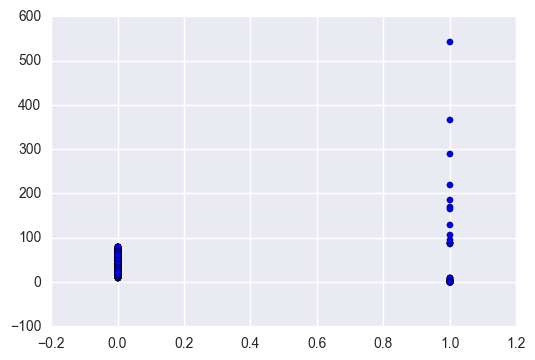

In [27]:
# Create dummies for "age invalid" variable

# SW: Trick for creating new columns where you have complicated logic:

def age_invalid(row):
    return row['age'] > 80 or row['age'] < 10

df_small['age_invalid'] = df_small.apply(lambda x: age_invalid(x), axis=1)


plt.scatter(df_small['age_invalid'], df_small['age'])

In [28]:
df_small.age_invalid.value_counts()

False    33859
True        65
Name: age_invalid, dtype: int64

In [29]:
# for "age invalid = true", create new column age_new and fill with NaN
# fill "age invalid = false", fill column with original age


def age_new(row):
    if row['age_invalid'] == True:
        return np.nan
    else:
        return row['age']
  

df_small['age_new'] = df_small.apply(lambda x: age_new(x), axis=1)


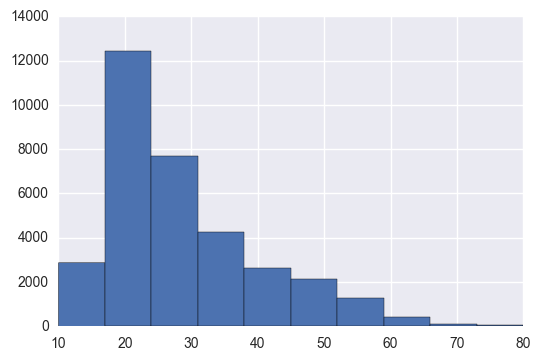

In [30]:
df_small.age_new.hist()

In [31]:
#How many 'age_new' variables are empty?
np.sum(df_small.age_new.isnull())

65

In [32]:
#What is the median of the 'age_new' column (without the "invalids")
df_small['age_new'].median()

25.0

In [33]:
#fill NAN in "age_new" with median

df_small['age_new'] = df_small['age_new'].fillna(df_small['age_new'].median()) 

In [34]:
np.sum(df_small.age_new.isnull())

0

In [35]:
#drop original 'age' column

df_small = df_small.drop('age', 1)
df_small.head()

,race,sex,inout,ac_incid,ac_time,timestop,offunif,typeofid,othpers,cs_objcs,...,cs_bulge,cs_other,frisked,searched,sumissue,arstmade,contrabn_gun,useforceany,age_invalid,age_new
0,1.0,1.0,0,0.0,0.0,2330,0,2,1,0.0,...,0.0,1.0,1,0,0,0,False,False,False,18.0
1,1.0,1.0,1,0.0,1.0,1530,0,1,0,0.0,...,0.0,0.0,1,1,0,1,False,True,False,31.0
2,1.0,1.0,1,0.0,0.0,2100,0,1,1,0.0,...,0.0,1.0,1,0,0,0,False,False,False,16.0
3,5.0,1.0,1,1.0,1.0,1250,1,1,1,0.0,...,0.0,0.0,1,0,0,0,False,False,False,19.0
4,1.0,1.0,1,1.0,1.0,1310,0,1,0,0.0,...,0.0,0.0,0,0,0,0,False,False,False,32.0


#### Create Race & ID Dummies

In [36]:
# Create dummies for "race" variable
race_dummies = pd.get_dummies(df_small.race, prefix="race", drop_first=True)
race_dummies.head()

,race_2.0,race_3.0,race_4.0,race_5.0,race_6.0
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [37]:
# Create dummies for "ID" variable
typeofid_dummies = pd.get_dummies(df_small.typeofid, prefix="typeofid", drop_first=True)
typeofid_dummies.head()

,typeofid_2,typeofid_3,typeofid_4
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [38]:
#Drop original race and ID columns

df_small_clean = df_small.drop(['race','typeofid'], 1)
df_small_clean.head()

,sex,inout,ac_incid,ac_time,timestop,offunif,othpers,cs_objcs,cs_descr,cs_casng,...,cs_bulge,cs_other,frisked,searched,sumissue,arstmade,contrabn_gun,useforceany,age_invalid,age_new
0,1.0,0,0.0,0.0,2330,0,1,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,False,False,False,18.0
1,1.0,1,0.0,1.0,1530,0,0,0.0,0.0,1.0,...,0.0,0.0,1,1,0,1,False,True,False,31.0
2,1.0,1,0.0,0.0,2100,0,1,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,False,False,False,16.0
3,1.0,1,1.0,1.0,1250,1,1,0.0,0.0,1.0,...,0.0,0.0,1,0,0,0,False,False,False,19.0
4,1.0,1,1.0,1.0,1310,0,0,0.0,0.0,1.0,...,0.0,0.0,0,0,0,0,False,False,False,32.0


In [39]:
#Add race_dummies and typeofid_dummies columns to dataframe

df_small_clean = pd.concat([df_small_clean, typeofid_dummies, race_dummies], axis=1)

df_small_clean.head()

,sex,inout,ac_incid,ac_time,timestop,offunif,othpers,cs_objcs,cs_descr,cs_casng,...,age_invalid,age_new,typeofid_2,typeofid_3,typeofid_4,race_2.0,race_3.0,race_4.0,race_5.0,race_6.0
0,1.0,0,0.0,0.0,2330,0,1,0.0,0.0,0.0,...,False,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1,0.0,1.0,1530,0,0,0.0,0.0,1.0,...,False,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1,0.0,0.0,2100,0,1,0.0,0.0,0.0,...,False,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1,1.0,1.0,1250,1,1,0.0,0.0,1.0,...,False,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1,1.0,1.0,1310,0,0,0.0,0.0,1.0,...,False,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Convert timestop to datetime

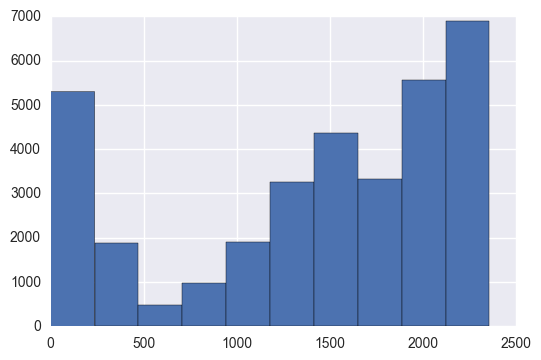

In [40]:
df_small_clean['timestop'].hist()

**SW:** Excellent!

In [41]:
#define function that takes in integer time (HHMM) and returns hour (HH)
def gethr(s):
    return str(s).zfill(4)[:2]

#apply function and create new column
df_small_clean['hour'] = df_small_clean['timestop'].apply(gethr)

#drop timestop
df_small_clean = df_small_clean.drop('timestop', 1)

df_small_clean.head()


,sex,inout,ac_incid,ac_time,offunif,othpers,cs_objcs,cs_descr,cs_casng,cs_lkout,...,age_new,typeofid_2,typeofid_3,typeofid_4,race_2.0,race_3.0,race_4.0,race_5.0,race_6.0,hour
0,1.0,0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,...,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
1,1.0,1,0.0,1.0,0,0,0.0,0.0,1.0,0.0,...,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
2,1.0,1,0.0,0.0,0,1,0.0,0.0,0.0,0.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
3,1.0,1,1.0,1.0,1,1,0.0,0.0,1.0,1.0,...,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12
4,1.0,1,1.0,1.0,0,0,0.0,0.0,1.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13


### Correlation matrix

In [42]:
df_small_clean.corr()

,sex,inout,ac_incid,ac_time,offunif,othpers,cs_objcs,cs_descr,cs_casng,cs_lkout,...,age_invalid,age_new,typeofid_2,typeofid_3,typeofid_4,race_2.0,race_3.0,race_4.0,race_5.0,race_6.0
sex,1.000000,-0.115606,0.029047,0.014452,-0.076510,-0.032375,0.012411,-0.000609,0.050190,0.013209,...,-0.005151,-0.022238,-0.019776,-0.005253,-0.009684,0.004789,-0.005155,-0.034175,0.018504,-0.006991
inout,-0.115606,1.000000,-0.036354,0.001588,0.206462,-0.075966,-0.003907,-0.038505,-0.107146,-0.055174,...,-0.003604,0.096471,-0.031567,-0.001658,0.039471,0.010507,0.015971,-0.065007,-0.062961,-0.011620
ac_incid,0.029047,-0.036354,1.000000,0.463635,-0.128570,-0.037281,0.027136,-0.237644,0.224646,0.146906,...,-0.005357,-0.001533,0.006312,-0.019052,-0.008527,0.006551,0.011167,0.005222,0.005781,0.002547
ac_time,0.014452,0.001588,0.463635,1.000000,-0.086330,-0.019193,0.006740,-0.163013,0.170765,0.158843,...,-0.003963,-0.007127,-0.003875,-0.023694,0.005404,0.008342,-0.000227,-0.001587,0.000596,0.002754
offunif,-0.076510,0.206462,-0.128570,-0.086330,1.000000,-0.042795,-0.004074,0.224108,-0.206152,-0.116452,...,0.009498,0.049367,-0.017759,0.032894,0.052203,0.024803,0.025465,-0.040482,-0.025274,0.005418
othpers,-0.032375,-0.075966,-0.037281,-0.019193,-0.042795,1.000000,-0.018235,0.066376,0.031535,0.056277,...,-0.009670,-0.182774,0.046986,-0.009980,-0.010870,0.003775,0.005966,0.044084,0.053927,-0.001203
cs_objcs,0.012411,-0.003907,0.027136,0.006740,-0.004074,-0.018235,1.000000,-0.054707,-0.040402,-0.023027,...,0.003051,0.073085,-0.036253,-0.012053,0.002081,0.015742,0.030688,0.037434,-0.009293,0.005334
cs_descr,-0.000609,-0.038505,-0.237644,-0.163013,0.224108,0.066376,-0.054707,1.000000,-0.245926,-0.156607,...,0.007427,-0.038311,0.012992,0.031508,0.022370,0.012333,-0.014459,-0.027122,-0.014349,-0.011395
cs_casng,0.050190,-0.107146,0.224646,0.170765,-0.206152,0.031535,-0.040402,-0.245926,1.000000,0.377278,...,0.001133,0.004022,0.001012,-0.024784,-0.026748,-0.016874,0.026241,0.067874,0.048760,0.010358
cs_lkout,0.013209,-0.055174,0.146906,0.158843,-0.116452,0.056277,-0.023027,-0.156607,0.377278,1.000000,...,-0.000968,-0.018058,0.007930,-0.016899,-0.007264,-0.003727,0.015587,0.044011,0.021997,0.027864


Which variables are highly correlated?

In [43]:
## do a "where" function to search for corr > .5 (or pivot tables)
# See Lesson 2- pandas and numpy or Lesson 5 - Pivot tables

### Plots

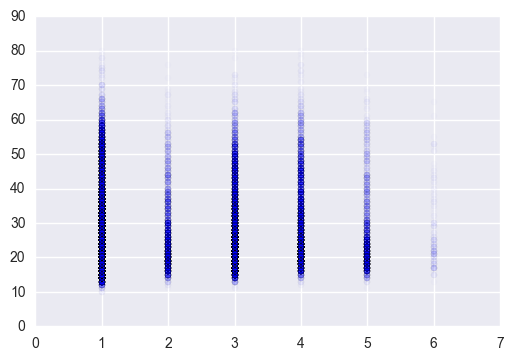

In [44]:
# plt.scatter(df_small['race'],df_small['age_new'])
plt.scatter(df_small['race'],df_small['age_new'], alpha=0.01)

Other plots:  


## Creating models

#### Splitting data into X and Y

In [50]:
# predictors=['gre', "rank_1"]

df_predictors = df_small_clean.copy()
df_predictors = df_predictors.drop('useforceany',1)
df_predictors.head()

X = df_predictors
y = df_small_clean['useforceany']

#### Look into regularization of data -- is it needed? 

In [51]:
# Model has a lot of features... so maybe
# See Lesson 7

### Logistic regression

In [52]:
lr = LogisticRegression()
lr.fit(X,y) #fitting to whole data set

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
#taking the exponentiation of a coefficient and see how much the odds multiply by when the variable increases by 1 unit.

np.exp(lr.coef_)

array([[ 0.88571757,  1.03186318,  1.0462002 ,  0.8987145 ,  1.29295331,
         1.13313365,  1.14272512,  1.69462835,  0.93359755,  0.88020544,
         1.20939353,  1.02778649,  1.18473625,  1.38588635,  1.21997995,
         1.34246006,  5.62860051,  1.88397073,  1.61687289,  1.59924106,
         1.40813748,  0.58220179,  0.99690897,  1.1211464 ,  1.32811588,
         1.28331815,  1.47027856,  1.2241596 ,  0.96733742,  0.77981004,
         0.81939746,  0.99536767]])

In [54]:
lr.predict(X)

array([False, False, False, ...,  True, False, False], dtype=bool)

In [55]:
lr.score(X,y)

0.76358919938686476

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.cross_validation import cross_val_score

print 'Logistic Regression CV accuracy score : ' + str(cross_val_score(lr, X, y, cv=5, scoring='accuracy').mean())
print 'Logistic Regression CV f1 score : ' + str(cross_val_score(lr, X, y, cv=5, scoring='f1').mean())
print 'Logistic Regression CV roc_auc score : ' + str(cross_val_score(lr, X, y, cv=5, scoring='roc_auc').mean())


Logistic Regression CV accuracy score : 0.761997269574
Logistic Regression CV f1 score : 0.322135406462
Logistic Regression CV roc_auc score : 0.749651446682


#### next steps: take out variables in predictors, try smaller?

#### Using gridsearch to find the best logistic regression model

In [57]:
from sklearn import grid_search, cross_validation

#predictors = 

X = df_predictors
y = df_small_clean['useforceany']


#let's try out all these different parameter values for C
parameters={'C': [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}


gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(), #we tell it the estimator we are using; a logistic regression
    param_grid=parameters,#we specify what the parameters we we want to try out are
    cv=5, #we specify how many cross-validation folds we want
    scoring='roc_auc' #we specify how to score each model to determine which one had the best score
)

In [58]:
gs.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [59]:
gs.grid_scores_

[mean: 0.74966, std: 0.01145, params: {'C': 100000},
 mean: 0.74965, std: 0.01146, params: {'C': 10000},
 mean: 0.74966, std: 0.01146, params: {'C': 1000},
 mean: 0.74965, std: 0.01146, params: {'C': 100},
 mean: 0.74966, std: 0.01146, params: {'C': 10},
 mean: 0.74965, std: 0.01150, params: {'C': 1},
 mean: 0.74930, std: 0.01186, params: {'C': 0.1},
 mean: 0.74325, std: 0.01373, params: {'C': 0.01},
 mean: 0.70759, std: 0.01478, params: {'C': 0.001},
 mean: 0.59321, std: 0.01181, params: {'C': 0.0001}]

Highest grid score is for c=100

In [60]:
print X.columns.values
print gs.best_estimator_.coef_

['sex' 'inout' 'ac_incid' 'ac_time' 'offunif' 'othpers' 'cs_objcs'
 'cs_descr' 'cs_casng' 'cs_lkout' 'cs_cloth' 'cs_drgtr' 'cs_furtv'
 'cs_vcrim' 'cs_bulge' 'cs_other' 'frisked' 'searched' 'sumissue'
 'arstmade' 'contrabn_gun' 'age_invalid' 'age_new' 'typeofid_2'
 'typeofid_3' 'typeofid_4' 'race_2.0' 'race_3.0' 'race_4.0' 'race_5.0'
 'race_6.0' 'hour']
[[-0.1119023   0.03205269  0.04666373 -0.1070381   0.25849151  0.12719227
   0.13479616  0.52972852 -0.06761882 -0.12791787  0.19053582  0.02900578
   0.17035812  0.32834445  0.20001702  0.29703823  1.73450695  0.63335822
   0.48368919  0.47082724  0.34256752 -0.59513541 -0.00292795  0.11634129
   0.29029188  0.25254428  0.38792496  0.20368036 -0.03169952 -0.24802261
  -0.21372514 -0.00451174]]


In [61]:
best = gs.best_estimator_
best.predict(X)

array([False, False, False, ...,  True, False, False], dtype=bool)

#### Note: I'm not entirely sure what good the grid search does for me....not sure how to use it and what the implications are

### Decision trees

In [79]:
# Defining and fitting the decision tree
import math

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', 
                           random_state=4)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=4, splitter='best')

In [80]:
dt.feature_importances_

# Put the feature importances in a list
feature_importances_array = dt.feature_importances_

# Put the features themselves in a list
features_array = X.columns.values 

# Turn these into a Data Frame
feature_importances_df = pd.DataFrame({'importances' : feature_importances_array,
                                       'features' : features_array})

# Sort the feature importances highest to lowest
feature_importances_df.sort(columns='importances',ascending=False)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
22,age_new,0.227074
31,hour,0.186215
16,frisked,0.090003
12,cs_furtv,0.034167
23,typeofid_2,0.030367
3,ac_time,0.029255
2,ac_incid,0.028802
5,othpers,0.027354
15,cs_other,0.023136
13,cs_vcrim,0.022805


**SW:** Here's a tip: encapsulate this in a function:

In [81]:
def get_feature_importances(tree_model):
    tree_model.feature_importances_

    # Put the feature importances in a list
    feature_importances_array = tree_model.feature_importances_

    # Put the features themselves in a list
    features_array = X.columns.values 

    # Turn these into a Data Frame
    feature_importances_df = pd.DataFrame({'importances' : feature_importances_array,
                                           'features' : features_array})

    # Sort the feature importances highest to lowest
    return feature_importances_df.sort(columns='importances',ascending=False)

get_feature_importances(dt)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,importances
22,age_new,0.227074
31,hour,0.186215
16,frisked,0.090003
12,cs_furtv,0.034167
23,typeofid_2,0.030367
3,ac_time,0.029255
2,ac_incid,0.028802
5,othpers,0.027354
15,cs_other,0.023136
13,cs_vcrim,0.022805


#### Note: suprised that age_new is the most important feature and worried that it's because of the data manipulations/cleaning. May need to drop that variable
#### Also, may need to convert hour to day/night to get more clarity on its predictive value

In [64]:
# Initialize a DecisionTreeClassifier object
dt = DecisionTreeClassifier(criterion='entropy', 
                           random_state=4)

# Get the cross validated accuracy score for each of the cross validation folds
print 'Decision Tree CV accuracy score : ' + str(cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean())
print 'Decision Tree CV f1 score : ' + str(cross_val_score(dt, X, y, cv=5, scoring='f1').mean())
print 'Decision Tree CV roc_auc score : ' + str(cross_val_score(dt, X, y, cv=5, scoring='roc_auc').mean())


Decision Tree CV accuracy score : 0.686003518618
Decision Tree CV f1 score : 0.390123684831
Decision Tree CV roc_auc score : 0.591995851908


#### Random Forest

In [77]:
rf = RandomForestClassifier(n_estimators = 100,
                           class_weight='balanced')


# Get the cross validated accuracy score for the mean of each of the cross validation folds
print 'Random Forest CV accuracy score : ' + str(cross_val_score(rf, X, y, cv=5, scoring='accuracy').mean())
print 'Random Forest CV f1 score : ' + str(cross_val_score(rf, X, y, cv=5, scoring='f1').mean())
print 'Random Forest CV roc_auc score : ' + str(cross_val_score(rf, X, y, cv=5, scoring='roc_auc').mean())


Random Forest CV accuracy score : 0.750294437647
Random Forest CV f1 score : 0.354660956654
Random Forest CV roc_auc score : 0.744657105749


In [74]:
et = ExtraTreesClassifier(n_estimators=1000,
                         class_weight='balanced')


# Get the cross validated accuracy score for each of three cross validation folds (one line below):
print cross_val_score(et, X, y, cv=5, scoring='accuracy').mean()


KeyboardInterrupt: 

In [75]:
gb = GradientBoostingClassifier(n_estimators=1000)
print cross_val_score(gb, X, y, cv=5, scoring='accuracy').mean()


KeyboardInterrupt: 

In [76]:
bdt = BaggingClassifier(DecisionTreeClassifier())

# Get the cross validated accuracy score for each of three cross validation folds 
print cross_val_score(bdt, X, y, cv=5, scoring='accuracy').mean()

KeyboardInterrupt: 

### NEXT STEPS:

In [ ]:
# Sams next steps:
    
# Data cleaning/exploratory
#     BONUS: import Astral python module, create function to take in timestop/datestop/latitutde/long and convert to "day" or "night"
#     add in precint as variable?
#     create more plots to show distribution of variables (See Sam's notes from Roland fryer paper) 
    
# run models!
#     get odds ratios  (logistic)  --- Lesson 10                                                     
#     dt/random forest
    
    
# intepretation
    # what is the most important predictor/strongest predictor?
    # what good does gridsearch do? are there any "so what" implications?

**SW:** Sam, this is excellent work - it has been great to see how far you've come, and I'm sure you could go much further with this modeling and analysis stuff if you wanted to.

In terms of next steps:

I wouldn't worry about the regularization. The analysis you did was asking the question: if we introduce a "penalization term" `C` which weights down the coefficients, so that the model is "punished" for having large coefficients, does that improve performance of the model? Looking at the "mean" cross-validation scores from trying different values of the regularization term, your analysis shows that you can improve the model fit by including some regularization, but that that improvement levels out beyond using `C` values greater than `1` - which is the default value that the Sci Kit Learn implementation of Logistic Regression uses anyway.

In terms of finalizing the model and the interpretation - from just un-commenting out some lines you had written above and running Random Forest, it looks like you can get a pretty accurate model, as measured by `ROC_AUC` scores. Interpreting the feature importances from that should be your next step, just as you did with your Decision Tree. Also, I'm not sure why you said that it wasn't surprising that "age" was the most important column - I think that is very surprising and interesting, and it is particularly interesting that "age" and "time of day" were more important than race - sort of confirms what Roland Fryer found!

You're definitely on the right track, but feel free to reach out if you have any more questions on Python, interpreting the models, or anything else.